# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [7]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets

import warnings
warnings.filterwarnings('ignore')

In [9]:
pn.extension()

In [8]:
# Read the Mapbox API key
load_dotenv("l:/mapbox.env")
map_box_api = os.getenv("map_box_key")
px.set_mapbox_access_token(map_box_api)


# Import Data

In [4]:
# Import the necessary CSVs to Pandas DataFrames

file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()
sfo_data_year_mean=sfo_data.groupby("year").mean()
sfo_data_year_mean.head()
sfo_data_year_mean=sfo_data.groupby(["year","neighborhood"]).mean().reset_index()
sfo_data_year_mean.head()
exp_neighborhood =sfo_data_year_mean.sort_values("sale_price_sqr_foot",ascending =False).head(10)
exp_neighborhood.head()
file_path = Path("Data/neighborhoods_coordinates.csv")
coodinates_data = pd.read_csv(file_path)
coodinates_data.head()

# YOUR CODE HERE!

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [37]:
# Define Panel Visualization Functions
def housing_units_per_year():
    housing_cost_year = sfo_data_year_mean[["sale_price_sqr_foot","gross_rent"]]
    plot_data_year_mean1 = sfo_data_year_mean["housing_units"]
    plot_data_year_mean = plot_data_year_mean1.sort_values()
    plot_data_graph = plot_data_year_mean.hvplot.bar(label="Housing Units in San Francisco From 2010 to 2016", rot=90,ylim=[370000, 390000],ylabel="housing_units")
    # YOUR CODE HERE!


def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    gross_rent_mean= sfo_data_year_mean["gross_rent"]
    plot_rent_graph = gross_rent_mean.hvplot.line(label="Housing Units in San Francisco From 2010 to 2016", rot=90,ylim=[1000,5000],ylabel="gross_rent")
  



def average_sales_price():
    """Average Sales Price Per Year."""
    sales_price_mean= sfo_data_year_mean["sale_price_sqr_foot"]
    plot_sales_price_graph = sales_price_mean.hvplot.line(label="Housing Units in San Francisco From 2010 to 2016", rot=90, ylim=[300,700],ylabel="sale_price_sqr_foot")
    plot_sales_price_graph  
    # YOUR CODE HERE!



def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    
    # YOUR CODE HERE!
    def county(neighborhood):
        return neighborhood
  
        San_Francisco_neighborhood = ['Alamo Square','Anza Vista','Bayview','Bayview Heights','Bernal Heights','Buena Vista Park','Central Richmond','Central Sunset','Clarendon Heights','Corona Heights','Cow Hollow','Croker Amazon','Diamond Heights','Downtown','Duboce Triangle','Eureka Valley/Dolores Heights','Excelsior','Financial District North','Financial District South','Forest Knolls','Glen Park','Golden Gate Heights','Haight Ashbury','Hayes Valley','Hunters Point','Ingleside','Ingleside Heights','Inner Mission','Inner Parkside','Inner Richmond','Inner Sunset','Jordan Park/Laurel Heights','Lake --The Presidio','Lone Mountain','Lower Pacific Heights','Marina','Merced Heights','Midtown Terrace','Miraloma Park','Mission Bay','Mission Dolores','Mission Terrace','Nob Hill','Noe Valley','North Beach','North Waterfront','Oceanview','Outer Mission','Outer Parkside','Outer Richmond','Outer Sunset','Pacific Heights','Park North','Parkside','Parnassus/Ashbury Heights','Portola','Potrero Hill','Presidio Heights','Russian Hill','Silver Terrace','South Beach','South of Market','Sunnyside','Telegraph Hill','Twin Peaks','Union Square District','Van Ness/ Civic Center','Visitacion Valley','West Portal','Western Addition','Westwood Highlands','Westwood Park','Yerba Buena',
]
 
        display(sfo_data_year_mean)
        plot_county_price = sfo_data_year_mean.hvplot.line(x="year", y= "sale_price_sqr_foot", groupby="neighborhood")
        interact(county,neighborhood= San_Francisco_neighborhood)    
        plot_county_price.head()



def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    exp_neighborhood =sfo_data_year_mean.sort_values("sale_price_sqr_foot",ascending =False).head(10)
    exp_neighborhood.head()

    # YOUR CODE HERE!
    
    


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # YOUR CODE HERE!

    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    sfo_data_year_mean=sfo_data.groupby(["year","neighborhood"]).mean().reset_index()
    sfo_data_year_mean.head()
    exp_neighborhood =sfo_data_year_mean.sort_values("sale_price_sqr_foot",ascending =False).head(10)
    exp_neighborhood.head()

    # YOUR CODE HERE!
    
    parallel_coordinates = px.parallel_coordinates(exp_neighborhood, color="neighborhood")
    parallel_coordinates
    


def parallel_categories():
    sfo_data_year_mean=sfo_data.groupby(["year","neighborhood"]).mean().reset_index()
    
    exp_neighborhood =sfo_data_year_mean.sort_values("sale_price_sqr_foot",ascending =False).head(10)
    
px.parallel_categories(
    exp_neighborhood,
    dimensions=["neighborhood","sale_price_sqr_foot", "gross_rent", "housing_units"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot":"Cost/Sqr'",
        "gross_rent":"Gross Rent",
        "housing_units": "Units",
    },
)


def neighborhood_map():
    """Neighborhood Map."""
   

    # YOUR CODE HERE!


def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!
Sunburst_graph =px.sunburst(
    exp_neighborhood,
    names='gross_rent',
    parents='neighborhood',
    values='gross_rent',
)
Sunburst_graph.show()

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [38]:
# Create a Title for the Dashboard
#San Francisco Neighborhodds Rent Analysis

# YOUR CODE HERE!
row_of_parallel = pn.Row(parallel_coordinates,parallel_categories)
row_of_bar = pn.Row(plot_rent_graph)
row_of_bar.append(plot_sales_price_graph )
plots_as_column = pn.Column(
        "## San Francisco Neighborhodds Rent Analysis", row_of_parallel, row_of_bar)

# Create a tab layout for the dashboard
# YOUR CODE HERE!

tabs = pn.Tabs(
    ("All Plots", plots_as_column),
    ("General Plots", row_of_bar),
    ("Statistical Plots", row_of_parallel)
)
tabs


# Create the dashboard
# YOUR CODE HERE!

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Column()
                [1] Row
                    [0] Str(None, name='interactive04321')
            [1] Column
                [0] Column()
                [1] Row
                    [0] Str(None, name='interactive04327')
        [2] Row
            [0] HoloViews(Curve)
            [1] HoloViews(Curve)
    [1] Row
        [0] HoloViews(Curve)
        [1] HoloViews(Curve)
    [2] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] Str(None, name='interactive04321')
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(None, name='interactive04327')

## Serve the Panel Dashboard

In [ ]:
# Serve the# dashboard
# YOUR CODE HERE!

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [20]:
# housing_units_per_year()
housing_cost_year = sfo_data_year_mean[["sale_price_sqr_foot","gross_rent"]]
plot_data_year_mean1 = sfo_data_year_mean["housing_units"]
plot_data_year_mean = plot_data_year_mean1.sort_values()
plot_data_graph = plot_data_year_mean.hvplot.bar(label="Housing Units in San Francisco From 2010 to 2016", rot=90,ylim=[370000, 390000],ylabel="housing_units")
    # YOUR CODE HERE!
plot_data_graph

:Bars   [index]   (housing_units)

In [21]:
# average_gross_rent()
gross_rent_mean= sfo_data_year_mean["gross_rent"]
plot_rent_graph = gross_rent_mean.hvplot.line(label="Housing Units in San Francisco From 2010 to 2016", rot=90,ylim=[1000,5000],ylabel="gross_rent")
plot_rent_graph 

:Curve   [index]   (gross_rent)

In [14]:
# average_sales_price()
sales_price_mean= sfo_data_year_mean["sale_price_sqr_foot"]
plot_sales_price_graph = sales_price_mean.hvplot.line(label="Housing Units in San Francisco From 2010 to 2016", rot=90, ylim=[300,700],ylabel="sale_price_sqr_foot")
plot_sales_price_graph 

:Curve   [index]   (sale_price_sqr_foot)

In [28]:
# average_price_by_neighborhood()
def county(neighborhood_p):
    return neighborhood_p
   # house_prices_plot 
#San_Francisco_neighborhood = ['Alamo Square','Anza Vista','Bayview','Bayview Heights','Bernal Heights','Buena Vista Park','Central Richmond','Central Sunset','Clarendon Heights','Corona Heights','Cow Hollow','Croker Amazon','Diamond Heights','Downtown','Duboce Triangle','Eureka Valley/Dolores Heights','Excelsior','Financial District North','Financial District South','Forest Knolls','Glen Park','Golden Gate Heights','Haight Ashbury','Hayes Valley','Hunters Point','Ingleside','Ingleside Heights','Inner Mission','Inner Parkside','Inner Richmond','Inner Sunset','Jordan Park/Laurel Heights','Lake --The Presidio','Lone Mountain','Lower Pacific Heights','Marina','Merced Heights','Midtown Terrace','Miraloma Park','Mission Bay','Mission Dolores','Mission Terrace','Nob Hill','Noe Valley','North Beach','North Waterfront','Oceanview','Outer Mission','Outer Parkside','Outer Richmond','Outer Sunset','Pacific Heights','Park North','Parkside','Parnassus/Ashbury Heights','Portola','Potrero Hill','Presidio Heights','Russian Hill','Silver Terrace','South Beach','South of Market','Sunnyside','Telegraph Hill','Twin Peaks','Union Square District','Van Ness/ Civic Center','Visitacion Valley','West Portal','Western Addition','Westwood Highlands','Westwood Park','Yerba Buena',
#]
 
display(sfo_data_year_mean)
plot_county_price = sfo_data_year_mean.hvplot.line(x="year", y= "sale_price_sqr_foot", groupby="neighborhood")
interact(county,neighborhood_p= San_Francisco_neighborhood)    


year                   neighborhood  sale_price_sqr_foot  housing_units  \
0    2010                   Alamo Square           291.182945         372560   
1    2010                     Anza Vista           267.932583         372560   
2    2010                        Bayview           170.098665         372560   
3    2010               Buena Vista Park           347.394919         372560   
4    2010               Central Richmond           319.027623         372560   
5    2010                 Central Sunset           418.172493         372560   
6    2010                 Corona Heights           369.359338         372560   
7    2010                     Cow Hollow           569.379968         372560   
8    2010                  Croker Amazon           165.645730         372560   
9    2010                Diamond Heights           456.930822         372560   
10   2010                      Downtown            241.804552         372560   
11   2010  Eureka Valley/Dolores Heights           403.118313         372560   
12   2010                      Excelsior           364.928336         372560   
13   2010       Financial District North           401.749967         372560   
14   2010       Financial District South           162.821210         372560   
15   2010                  Forest Knolls           209.049327         372560   
16   2010                      Glen Park           715.586438         372560   
17   2010            Golden Gate Heights           551.801119         372560   
18   2010                 Haight Ashbury           254.473779         372560   
19   2010                   Hayes Valley           272.284980         372560   
20   2010                  Hunters Point           170.624920         372560   
21   2010                     Ingleside            275.056686         372560   
22   2010                  Inner Mission           238.350020         372560   
23   2010                 Inner Parkside           199.702004         372560   
24   2010                 Inner Richmond           285.822358         372560   
25   2010                   Inner Sunset           275.769730         372560   
26   2010     Jordan Park/Laurel Heights           419.887812         372560   
27   2010            Lake --The Presidio           320.796910         372560   
28   2010                  Lone Mountain           398.458876         372560   
29   2010          Lower Pacific Heights           374.057636         372560   
..    ...                            ...                  ...            ...   
367  2016                  Inner Mission           647.770447         384242   
368  2016                 Inner Parkside           518.112650         384242   
369  2016                 Inner Richmond           403.311132         384242   
370  2016                   Inner Sunset           445.923828         384242   
371  2016     Jordan Park/Laurel Heights           704.566419         384242   
372  2016          Lower Pacific Heights           636.430770         384242   
373  2016                         Marina           431.944602         384242   
374  2016                 Merced Heights          1416.666667         384242   
375  2016                    Mission Bay           924.569116         384242   
376  2016                Mission Terrace           879.017013         384242   
377  2016                       Nob Hill           777.008315         384242   
378  2016                     Noe Valley           799.495651         384242   
379  2016                    North Beach           407.553322         384242   
380  2016                  Outer Mission            40.772625         384242   
381  2016                 Outer Parkside           732.720684         384242   
382  2016                Outer Richmond           1196.645437         384242   
383  2016                   Outer Sunset           510.576907         384242   
384  2016                Pacific Heights           996.389364         384242   
385  

Column
    [0] Column
        [0] Select(name='neighborhood_p', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] Markdown(str, name='interactive02522')

In [24]:
# top_most_expensive_neighborhoods()
sfo_data_year_mean=sfo_data.groupby(["year","neighborhood"]).mean().reset_index()
sfo_data_year_mean.head()

exp_neighborhood =sfo_data_year_mean.sort_values("sale_price_sqr_foot",ascending =False).head(10)
exp_neighborhood.head()

year           neighborhood  sale_price_sqr_foot  housing_units  \
346  2015  Union Square District          2258.702832         382295   
388  2016       Presidio Heights          1465.968586         384242   
374  2016         Merced Heights          1416.666667         384242   
226  2013  Union Square District          1290.472107         378401   
262  2014          Miraloma Park          1267.766203         380348   

     gross_rent  
346        3739  
388        4390  
374        4390  
226        2971  
262        3528

In [ ]:
plot_exp_neighborhood = exp_neighborhood.hvplot.bar(x="neighborhood", y= "sale_price_sqr_foot", rot=45,title="10 expensive neighborhoods in SFO")
plot_exp_neighborhood

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [25]:
# neighborhood_map().show()
load_dotenv("L:/mapbox.env")
map_box_api = os.getenv("map_box_key")

#  print(map_box_api) =====Testing the key
# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
neighborhood_with_coordinates = pd.concat([sfo_data_neighbourhood_mean, coodinates_data], axis=1, join='inner')
neighborhood_with_coordinates.head()
data_to_plot = neighborhood_with_coordinates[["neighborhood", "gross_rent", "Lat", "Lon"]]
map_plot = px.scatter_mapbox(
    data_to_plot,
    lat="Lat",
    lon="Lon",
    size="gross_rent",
    color="neighborhood",
    zoom=1
)

# Display the map
map_plot.show()


NameError: name 'sfo_data_neighbourhood_mean' is not defined

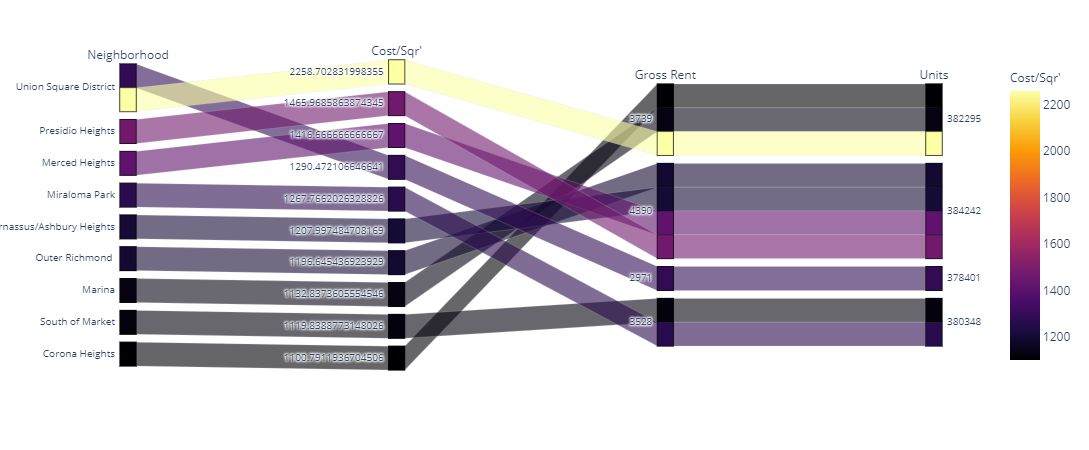

In [18]:
# parallel_categories()

exp_neighborhood =sfo_data_year_mean.sort_values("sale_price_sqr_foot",ascending =False).head(10)


px.parallel_categories(
    exp_neighborhood,
    dimensions=["neighborhood","sale_price_sqr_foot", "gross_rent", "housing_units"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot":"Cost/Sqr'",
        "gross_rent":"Gross Rent",
        "housing_units": "Units",
    },
)

In [19]:
# parallel_coordinates()
parallel_coordinates = px.parallel_coordinates(exp_neighborhood, color="neighborhood")
parallel_coordinates

In [ ]:
# sunburst()
Sunburst_graph =px.sunburst(
    exp_neighborhood,
    names='gross_rent',
    parents='neighborhood',
    values='gross_rent',
)
Sunburst_graph.show()